## **Import and load the data file**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


We import the necessary packages for our chatbot and initialize the variables we will use in our Python project.
The data file is in JSON format so we used the json package to parse the JSON file into Python.

In [2]:
import nltk
nltk.download('punkt')      #Sentence tokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install tensorflow

In [5]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

# **Preprocessing**

In [6]:
words=[]        # Vocab Words in the Patterns/Questions
classes = []    # Tags[Greetings, malware_subtypes.....]
documents = []  # Words are present in which Class?
ignore_words = ['?', '!']
data_file = open('intents.json').read() # read json file
intents = json.loads(data_file) # load json file

When working with text data, we need to perform various preprocessing on the data before we make a machine learning or a deep learning model. Based on the requirements we need to apply various operations to preprocess the
data.
- Tokenizing is the most basic and first thing you can do on text data.
- Tokenizing is the process of breaking the whole text into small parts like words.
- Here we iterate through the patterns and tokenize the sentence using nltk.word_tokenize() function and append each word in the words list. We also create a list of classes for our tags.

In [7]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)# add each elements into list
        #combination between patterns and intents
        documents.append((w, intent['tag']))#add single element into end of list
        # add to tag in our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [8]:
words[:9]

['Hi', 'Hello', 'Hey', 'Greetings', 'What', 'is', 'malware', '?', 'How']

In [9]:
documents[:9]

[(['Hi'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Hey'], 'greeting'),
 (['Greetings'], 'greeting'),
 (['What', 'is', 'malware', '?'], 'malware_general'),
 (['How', 'to', 'prevent', 'malware', '?'], 'malware_general'),
 (['Tell', 'me', 'about', 'malware', 'types'], 'malware_general'),
 (['How', 'does', 'antivirus', 'work', '?'], 'malware_general'),
 (['Tell', 'me', 'about', 'viruses'], 'malware_subtypes')]

In [10]:
classes[:9]

['greeting',
 'malware_general',
 'malware_subtypes',
 'malware_symptoms',
 'malware_challenges',
 'malware_impacts',
 'malware_countermeasures',
 'phishing_general',
 'phishing_subtypes']

In [11]:
nltk.download('wordnet') #lexical database for the English language

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [12]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [13]:
len(words)

620

Now we will lemmatize each word and remove duplicate words from the list.
- Lemmatizing is the process of converting a word into its lemma form and then creating a pickle file to store the Python objects which we will use while predicting.

In [14]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents\n", documents, "\n")
# classes = intents[tag]
print (len(classes), "classes\n", classes, "\n")
# words = all words, vocabulary
print (len(words), "unique lemmatized words\n", words, "\n")
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

75 documents
 [(['Hi'], 'greeting'), (['Hello'], 'greeting'), (['Hey'], 'greeting'), (['Greetings'], 'greeting'), (['What', 'is', 'malware', '?'], 'malware_general'), (['How', 'to', 'prevent', 'malware', '?'], 'malware_general'), (['Tell', 'me', 'about', 'malware', 'types'], 'malware_general'), (['How', 'does', 'antivirus', 'work', '?'], 'malware_general'), (['Tell', 'me', 'about', 'viruses'], 'malware_subtypes'), (['What', 'are', 'worms', '?'], 'malware_subtypes'), (['Explain', 'ransomware'], 'malware_subtypes'), (['What', 'are', 'the', 'subtypes', 'in', 'malware', 'attacks', '?'], 'malware_subtypes'), (['What', 'are', 'different', 'types', 'of', 'malware', 'attacks', '?'], 'malware_subtypes'), (['Types', 'of', 'malware', '?'], 'malware_subtypes'), (['Continuous', 'crashes', '(', 'e.g', '.', 'systems', ',', 'programs', ',', 'Blue', 'Screen', 'of', 'Death', ')', '.'], 'malware_symptoms'), (['Slow', 'computer', 'performance', '(', 'e.g', '.', 'sluggish', 'start', ',', 'slow', 'when', 'l

# **Training Model**

Now, we will create the training data in which we will provide the input and the output.
- Our input will be the pattern and output will be the class our input pattern belongs to. But the computer doesn’t understand text so we will convert text into numbers

In [15]:
!pip install numpy

In [16]:
doc = documents[6]
doc

(['Tell', 'me', 'about', 'malware', 'types'], 'malware_general')

In [17]:
doc[0]

['Tell', 'me', 'about', 'malware', 'types']

In [18]:
words[84]

'goodbye'

In [19]:
bag = []
bag

[]

In [20]:
bag.append(1)

In [21]:
bag

[1]

In [22]:
output_row = [0] * len(classes)
output_row

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
classes[:9]

['ddos_challenges',
 'ddos_countermeasures',
 'ddos_general',
 'ddos_impacts',
 'ddos_subtypes',
 'ddos_symptoms',
 'greeting',
 'malware_challenges',
 'malware_countermeasures']

In [24]:
# Get the Index from the List
classes.index('malware_countermeasures')

8

In [25]:
doc[1]

'malware_general'

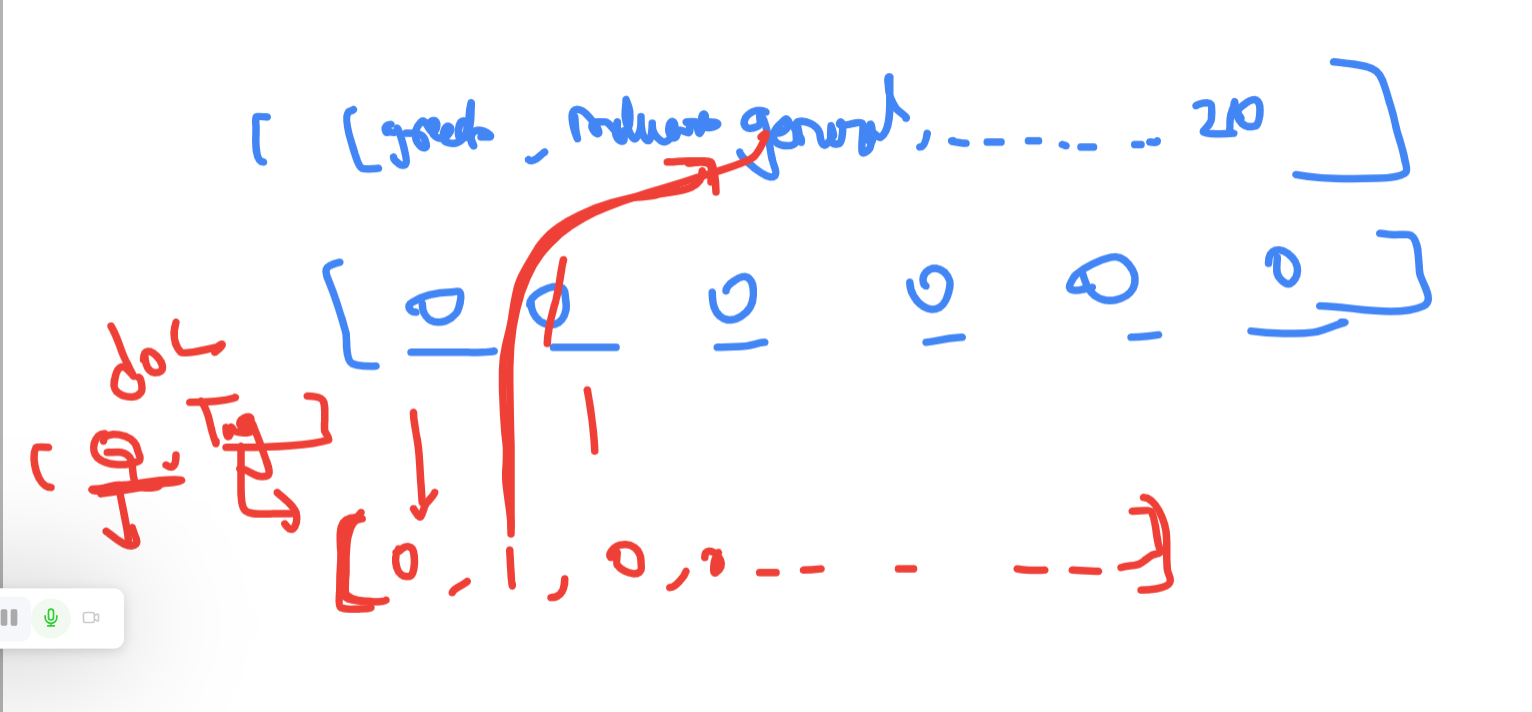

In [26]:
documents[5]

(['How', 'to', 'prevent', 'malware', '?'], 'malware_general')

In [27]:
words

["'",
 "'s",
 '(',
 ')',
 ',',
 '.',
 '20',
 ':',
 '@',
 'a',
 'about',
 'access',
 'activity',
 'address',
 'against',
 'all',
 'also',
 'amount',
 'an',
 'and',
 'annoying',
 'antivirus',
 'application',
 'are',
 'asking',
 'at',
 'attachment',
 'attack',
 'be',
 'become',
 'becomes',
 'behavior',
 'blue',
 'browser',
 'can',
 'challenge',
 'communication',
 'company',
 'computer',
 'computing',
 'contains',
 'continuous',
 'corrupted',
 'could',
 'crash',
 'critical',
 'day',
 'ddos',
 'death',
 'department',
 'desktop',
 'device',
 'different',
 'difficulty',
 'disabled',
 'doe',
 'domain',
 'drive',
 'e.g',
 'either',
 'email',
 'employee',
 'encrypted',
 'endpoint',
 'equipment',
 'error',
 'etc',
 'event',
 'example',
 'excessive',
 'experience',
 'explain',
 'extremely',
 'family',
 'farewell',
 'file',
 'flood',
 'flow',
 'for',
 'formal',
 'from',
 'general',
 'generates',
 'give',
 'goodbye',
 'grammatical',
 'greeting',
 'ha',
 'hard',
 'hello',
 'hey',
 'hi',
 'how',
 'ico

In [17]:
import numpy as np
import random

# Create empty lists for bags and output_rows
bags = []
output_rows = []

# doc[0]  ---> Questions
# doc[1] -----> Tag/Class

# Iterate through documents to create bags and output_rows
for doc in documents:   # 75
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    # Create a bag for the current document
    # if word is present in the Question append 1 else 0
    for w in words:   # For Each Word in the Unique Words of All Questions [Iterations]   == 233 words
        bag.append(1) if w in pattern_words else bag.append(0)

    # bag size?   --> 233
    # bag = [0,0,0,0,0,1,0,1,1,1,0,0,0...233]
    # Create the output row for the current document
    output_row = [0] * len(classes)
    output_row[classes.index(doc[1])] = 1

    # Append the bag and output_row to their respective lists
    bags.append(bag)
    output_rows.append(output_row)

In [29]:
documents[70]

(['How', 'to', 'protect', 'against', 'DDoS', 'attacks', '?'],
 'ddos_countermeasures')

In [30]:
classes[2]

'ddos_general'

In [31]:
words[70]

'experience'

In [32]:
output_rows[70]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [33]:
bags[70]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [34]:

output_rows[:5]

[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [35]:
# Convert bags and output_rows to numpy arrays
bags = np.array(bags)
output_rows = np.array(output_rows)
print(bags)
print(output_rows)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [36]:
## bags --> Patterns/Question    (x)
## output_rows --> Tag/Class      (y)

In [18]:
# Convert bags and output_rows to numpy arrays
bags = np.array(bags)
output_rows = np.array(output_rows)

# Combine bags and output_rows into a list of tuples
training = list(zip(bags, output_rows))

# Shuffle training
random.shuffle(training)

# Convert bags and output_rows back to lists for easier indexing
bags, output_rows = zip(*training)

# Convert bags and output_rows to numpy arrays
bags = np.array(bags)
output_rows = np.array(output_rows)

# Split into train and test sets
train_x = bags
train_y = output_rows

# Use the same data for the test for now (you might want to split differently)
test_x = train_x
test_y = train_y

print("Training data created")

Training data created


In [19]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [20]:
len(bags[0])

233

In [21]:
len(train_x[0])

233

In [22]:
len(bags)

75

In [23]:
len(train_y[0])

20

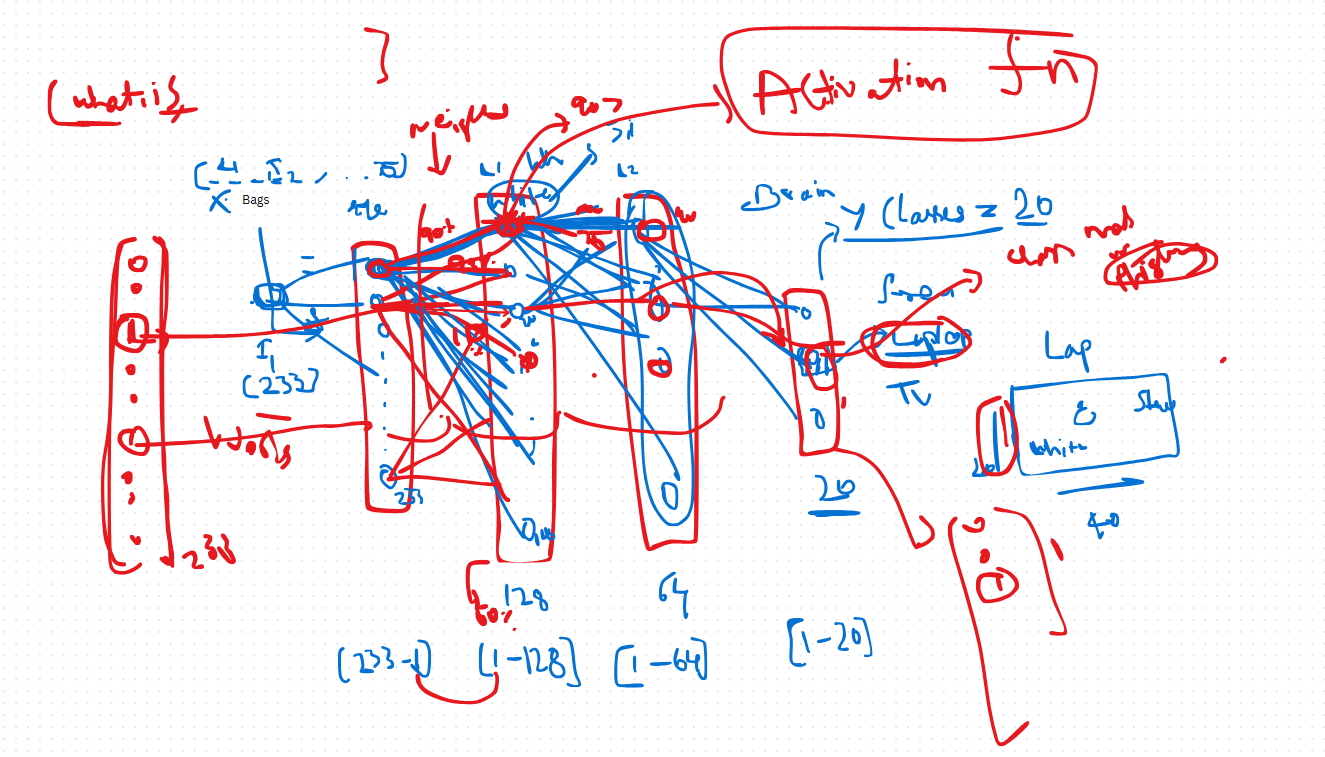

# **Build the model**

We have our training data ready, now we will build a deep neural network that has 3 layers. We use the Keras sequential API for this. After training the model for 200 epochs, we achieved 100% accuracy on our model. Let us save the model as ‘chatbot_model.h5'.

In [24]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))    # Layer 1
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))     # Layer 2
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))     # Layer 3 : [Output]
print("First layer:",model.layers[0].get_weights()[0])


First layer: [[ 0.09803885  0.06826977 -0.06304389 ...  0.05815725  0.0260016
   0.11855352]
 [-0.09447498 -0.12025937  0.07366754 ... -0.12748623 -0.08736673
  -0.00325644]
 [-0.08529343  0.0817392   0.04713579 ... -0.05298341 -0.08226478
  -0.07025816]
 ...
 [-0.07166025  0.06279354 -0.10750613 ...  0.01098029 -0.06699318
  -0.02679689]
 [ 0.00732811  0.09278153 -0.03486884 ...  0.08992498 -0.11706536
   0.08771227]
 [-0.04482438 -0.11568191 -0.01129933 ...  0.06642392 -0.05941044
   0.05663487]]


In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=75, batch_size=5, verbose=1)
model.save('new_chatbot_model.h5')

print("model created")


Epoch 1/75


15/15 [==============================] - 3s 7ms/step - loss: 3.0766 - accuracy: 0.0133
Epoch 2/75
15/15 [==============================] - 0s 6ms/step - loss: 2.9728 - accuracy: 0.0800
Epoch 3/75
15/15 [==============================] - 0s 4ms/step - loss: 2.8690 - accuracy: 0.1600
Epoch 4/75
15/15 [==============================] - 0s 6ms/step - loss: 2.7657 - accuracy: 0.1067
Epoch 5/75
15/15 [==============================] - 0s 5ms/step - loss: 2.6483 - accuracy: 0.2667
Epoch 6/75
15/15 [==============================] - 0s 6ms/step - loss: 2.4753 - accuracy: 0.2267
Epoch 7/75
15/15 [==============================] - 0s 4ms/step - loss: 2.3681 - accuracy: 0.2800
Epoch 8/75
15/15 [==============================] - 0s 3ms/step - loss: 2.3841 - accuracy: 0.2933
Epoch 9/75
15/15 [==============================] - 0s 7ms/step - loss: 2.1376 - accuracy: 0.4133
Epoch 10/75
15/15 [==============================] - 0s 4ms/step - loss: 2.1743 - accuracy: 0.3067
Epoch 11/75
15/15

In [46]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)


In [47]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(np.array(test_x), np.array(test_y), verbose=1)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0816 
Test loss: 0.07871323078870773
Test accuracy: 1.0


# FOR PREDICTING RESPONSE


In [48]:
intents = json.loads(open('/content/drive/MyDrive/Previous Projects/CyberSecurity Chatbot/intents.json').read())

words = pickle.load(open('words.pkl','rb'))

classes = pickle.load(open('classes.pkl','rb'))

In [49]:
def clean_up_sentence(sentence):

# tokenize the pattern - split words into array

  sentence_words = nltk.word_tokenize(sentence)
#print(sentence_words)
# stem each word - create short form for word

  sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
#print(sentence_words)b

  return sentence_words

In [50]:
def bow(sentence, words, show_details=True):

# tokenize the pattern

  sentence_words = clean_up_sentence(sentence)
  #print(sentence_words)

  # bag of words - matrix of N words, vocabulary matrix

  bag = [0]*len(words)
  #print(bag)

  for s in sentence_words:
      for i,w in enumerate(words):
          if w == s:
              # assign 1 if current word is in the vocabulary position
              bag[i] = 1
              if show_details:
                  print ("found in bag: %s" % w)
              #print ("found in bag: %s" % w)
  #print(bag)
  return(np.array(bag))

In [51]:
def predict_class(sentence, model):

  # filter out predictions below a threshold

  p = bow(sentence, words,show_details=False)
  #print(p)

  res = model.predict(np.array([p]))[0]
  #print(res)

  ERROR_THRESHOLD = 0.25

  results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
  #print(results)
  # sort by strength of probability

  results.sort(key=lambda x: x[1], reverse=True)
  #print(results)

  return_list = []

  for r in results:
      return_list.append({"intent": classes[r[0]], "probability": str(r[1])})

  return return_list
  #print(return_list)

In [52]:
def getResponse(ints, intents_json):

  tag = ints[0]['intent']
  #print(tag)

  list_of_intents = intents_json['intents']
  #print(list_of_intents)

  for i in list_of_intents:
      if(i['tag']== tag):
          result = random.choice(i['responses'])
          break
  return result

In [53]:
def chatbot_response(text):
  ints = predict_class(text, model)

  #print(ints)

  res = getResponse(ints, intents)
  #print(res)
  return res

# Predicting results

In [54]:
start = True
while start:

  query = input('Enter Message:')
  if query in ['quit','exit','bye']:
      start = False
      continue
  try:
      res = chatbot_response(query)
      print(res)
  except:
      print('You may need to rephrase your question.')

KeyboardInterrupt: Interrupted by user

In [ ]:
!pip install gtts


In [ ]:
import nltk
nltk.download('punkt')  # Sentence tokenizer
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from gtts import gTTS
from IPython.display import Audio, display

# Your existing code...

start = True
while start:
    query = input('Enter Message:')
    if query.lower() in ['quit', 'exit', 'bye']:
        start = False
        continue

    try:
        res = chatbot_response(query)
        print(res)

        # Convert the response to speech
        tts = gTTS(text=res, lang='en')
        tts.save("response.mp3")

        # Play the response
        display(Audio(filename="response.mp3", autoplay=True))

    except Exception as e:
        print(f'Error: {e}')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter Message:Hello
1/1 [==============================] - 0s 95ms/step
Hello! How can I assist you with cybersecurity today?


Enter Message:What is malware?
1/1 [==============================] - 0s 26ms/step
Malicious software, or shortly malware, denotes a generic term that covers all software programs which deliberately cause damage to systems or other software programs. There exist a broad range of attacking threats trying to sneak into your system, reaching either to your data or core system functionality to derange the ordinary operations.


Enter Message:what is phishing?
1/1 [==============================] - 0s 23ms/step
Phishing subtypes generally include standard phishing, spear phishing, and whaling. Each subtype has unique characteristics and poses specific challenges.


Enter Message:bye


In [ ]:
!pip install gtts

In [ ]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 23.3 MB/s eta 0:00:00


In [ ]:
!apt-get install -y libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libasound2-dev' instead of 'libasound-dev'
libasound2-dev is already the newest version (1.2.6.1-1ubuntu1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 0s (1,771 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121749 files and directories currently installed.)
Prepar

In [ ]:
!pip install pyaudio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudio: filename=PyAudio-0.2.14-cp310-cp310-linux_x86_64.whl size=63857 sha256=607b451beb9f7b2d12ae8dcce19526be08f756995506480e9b20eb441e0466c1
  Stored in directory: /root/.cache/pip/wheels/d6/21/f4/0b51d41ba79e51b16295cbb096ec49f334792814d545b508c5
Successfully built pyaudio


In [ ]:
import speech_recognition as sr

# Print the list of available audio input devices and their indices
print(sr.Microphone.list_microphone_names())


[]


In [ ]:
!pip install SpeechRecognition pydub


In [ ]:
import nltk
nltk.download('punkt')  # Sentence tokenizer
from nltk.stem import WordNetLemmatizer
import json
import pickle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from gtts import gTTS
from IPython.display import Audio, display
from pydub import AudioSegment
from pydub.playback import play
import speech_recognition as sr

# Patch the speech_recognition library to use pydub for audio playback
def patched_play_mp3(audio_file, start=0, end=None):
    audio = AudioSegment.from_mp3(audio_file)
    play(audio[start:end])

sr.AudioFile.play_mp3 = patched_play_mp3

# Your existing code...

def get_voice_input():
    recognizer = sr.Recognizer()
    microphone = sr.Microphone()

    with microphone as source:
        print("Say something:")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source, timeout=5)

    try:
        text = recognizer.recognize_google(audio)
        print("You said:", text)

        # Convert the recognized text to an audio file
        tts = gTTS(text=text, lang='en')
        tts.save("input_audio.mp3")

        # Play the captured audio
        play(AudioSegment.from_mp3("input_audio.mp3"))

        return "input_audio.mp3"

    except sr.UnknownValueError:
        print("Could not understand audio.")
        return None
    except sr.RequestError as e:
        print(f"Error connecting to Google API: {e}")
        return None

# The rest of your code...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install pydub sounddevice

In [ ]:
!pip install pyttsx3


In [ ]:
!pip install ffmpeg-python

In [ ]:
!pip install SpeechRecognition pydub

In [ ]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
from pydub import AudioSegment
from pydub.playback import play
import time
import io
from pydub import AudioSegment
from pydub.playback import play
import ffmpeg
import numpy as np
from scipy.io.wavfile import read as wav_read

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    mimeType : 'audio/webm;codecs=opus'
  };
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
    }
  };
  recorder.start();
};

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);

function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  resolve(base64data.toString())
});
}
});

</script>
"""




In [ ]:

def get_audio():
    display(HTML(AUDIO_HTML))
    data = eval_js("data")

    if not data:
        return None, None

    binary = b64decode(data.split(',')[1])

    # Convert audio data to pydub AudioSegment
    audio_segment = AudioSegment.from_file(io.BytesIO(binary), format="webm")

    # Convert to mono channel
    audio_segment = audio_segment.set_channels(1)

    # Convert to 16-bit PCM format
    audio_segment = audio_segment.set_sample_width(2)

    # Convert to 16 kHz sample rate
    audio_segment = audio_segment.set_frame_rate(16000)

    # Save the processed audio to a file
    audio_segment.export("audio.wav", format="wav")

    # Read the processed audio file
    sr, audio = wav_read("audio.wav")

    return audio, sr

start = True
while start:
    query_audio, _ = get_audio()

    if query_audio is not None:
        try:
            res = chatbot_response(query_audio)
            print(res)

            # Convert the response to speech
            tts = gTTS(text=res, lang='en')
            tts.save("response.mp3")

            # Play the response
            display(Audio(filename="response.mp3", autoplay=True))

        except Exception as e:
            print(f'Error: {e}')

    # Add a delay after processing to prevent continuous recording
    time.sleep(5)  # You can adjust the delay as needed
    start = False  # Stop the recording loop after the first iteration

Error: cannot use a string pattern on a bytes-like object


In [ ]:
import speech_recognition as sr
from gtts import gTTS
from IPython.display import Audio, display

def speech_to_text(audio_file):
    recognizer = sr.Recognizer()

    with sr.AudioFile(audio_file) as source:
        audio = recognizer.record(source)

    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        print("Could not understand audio.")
        return None
    except sr.RequestError as e:
        print(f"Error connecting to Google API: {e}")
        return None

# Get the text from "audio.wav"
audio_text = speech_to_text("audio.wav")

# Ask the bot using the detected text
if audio_text:
    try:
        res = chatbot_response(audio_text)
        print(res)

        # Convert the response to speech
        tts = gTTS(text=res, lang='en')
        tts.save("response.mp3")

        # Play the response
        display(Audio(filename="response.mp3", autoplay=True))

    except Exception as e:
        print(f'Error: {e}')


1/1 [==============================] - 0s 24ms/step
Malicious software, or shortly malware, denotes a generic term that covers all software programs which deliberately cause damage to systems or other software programs. There exist a broad range of attacking threats trying to sneak into your system, reaching either to your data or core system functionality to derange the ordinary operations.


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00
